# Conftur - Analysis

Jupyter Notebook that analyzes data for studying the correlation between the "touristicy" of conference venue and its articles impact.

Our analysis are mainly diveded in two parts:
* Exploratory analysis on the bibliometric data
* Computation and analysis of the correlation between the articles impact and the touristicy of the different conferences locations

____________________________________________________________

For this process, our datasets are going to be used. They can be generated running the notebooks contained in the ```Dataset Creation Pipeline``` folder.


In [1]:
# Libraries Import
from datetime import date
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import os

# Libraries options
#mpl.rcParams['font.size'] = 22
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-colorblind')

## File Paths
Please set your working directory paths.

In [2]:
# ******************* PATHS ********************+

# Import Directory Path
path_file_import = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Import/'

# CSV Exports Directory Path
path_file_export = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Export/'

### Creation of the Output Directories

In [3]:
if not os.path.exists(path_file_export + 'charts'):
    os.makedirs(path_file_export + 'charts')

## Import of the Citation Dataset

In [4]:
df_citations_and_locations = pd.read_csv(path_file_import + 'out_COCI_citations_and_locations_analysis_ready.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Conference Citations and Locations CSV')

Successfully Imported the Conference Citations and Locations CSV


In [5]:
df_citations_and_locations

,CitationCount,ConferenceLocation,ConferenceNormalizedName,ConferenceSeriesNormalizedName,Doi,Year
0,10,"Austin, Texas, United States",disc 2014,disc,10.1007/978-3-662-45174-8_28,2014
1,5,"Wrocław, Lower Silesian Voivodeship, Poland",esa 2014,esa,10.1007/978-3-662-44777-2_60,2014
2,11,"Innsbruck, Tyrol, Austria",enter 2013,enter,10.1007/978-3-319-03973-2_13,2013
3,1,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",dexa 2002,dexa,10.1007/3-540-46146-9_77,2002
4,9,"Zakopane, Lesser Poland Voivodeship, Poland",icaisc 2006,icaisc,10.1007/11785231_94,2006
...,...,...,...,...,...,...
3107878,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_9,2011
3107879,4,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_20,2011
3107880,2,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_25,2011
3107881,0,"Thessaloniki, Macedonia and Thrace, Greece",sapere 2011,sapere,10.1007/978-3-642-31674-6_12,2011


## Data Cleanup
Before proceeding with the analysis, we need to filter the two recent articles and the too old one (we do not have enough data for the oldest conferences).

### Removing the too recent articles

In [6]:
actual_year = date.today().year

Here you can specify how many years old articles should be at least

In [7]:
minimum_years = 5

Removing the too recent articles:

In [8]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year > actual_year - minimum_years].index)

### Removing the too old articles

We're going to compute the number of citations for each year, so we can choose the starting year for our analysis.

In [9]:
df_articles_groupby_year = df_citations_and_locations.groupby(['Year']).CitationCount.count()
df_articles_groupby_year.head(50)

Year
1951       19
1952       75
1953       55
1954       44
1955       44
1956       72
1957       87
1958      138
1959      173
1960       66
1961      125
1962       81
1963      106
1964      165
1965      242
1966      167
1967      414
1968      298
1969      412
1970      353
1971      655
1972      973
1973     1354
1974     1593
1975     1399
1976     1799
1977     1412
1978     1944
1979     1978
1980     1973
1981     2590
1982     3214
1983     2608
1984     3129
1985     3479
1986     4583
1987     4723
1988     8136
1989     9444
1990    11409
1991    11520
1992    14013
1993    15515
1994    22345
1995    21537
1996    23668
1997    24675
1998    32151
1999    34126
2000    40685
Name: CitationCount, dtype: int64

Here you can specify the starting year.

In [10]:
start_year = 1981

Removing the too old articles:

In [11]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year < 1981].index)

Reset the indexes after the drop:

In [12]:
df_citations_and_locations = df_citations_and_locations.reset_index(drop=True)

### Removing the Articles Without Citations

In [13]:
df_citations_and_locations = df_citations_and_locations.loc[df_citations_and_locations['CitationCount'] > 0]

____________________________________________________________

## Exploratory Data Analysis on the Bibliometric Data

### General Top and Flop 10 Classifications

#### Top 10 Conferences Editions by Citation Count

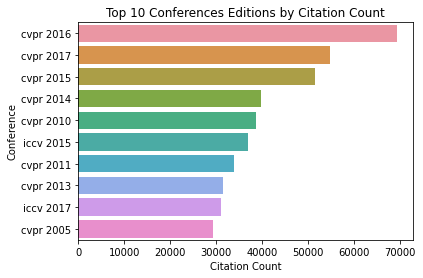

In [14]:
citations_top10 = {v:k for v,k in df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False).head(10).items()}

citations_top10_plot = sns.barplot(x=list(citations_top10.values()), y=list(citations_top10.keys()))

plt.title("Top 10 Conferences Editions by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_editions_cit_top_10.png')

#### Flop 10 Conferences Editions by Citation Count

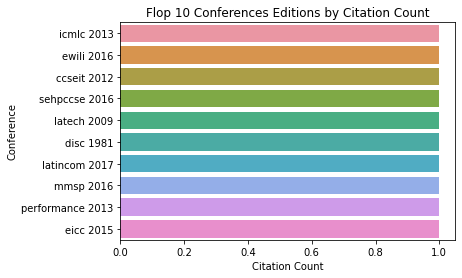

In [15]:
# Only for the conferences with at least a citation
citations_flop10 = {v:k for v,k in df_citations_and_locations[df_citations_and_locations['CitationCount']>0].groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values().head(10).items()}

citations_flop10_plot = sns.barplot(x=list(citations_flop10.values()), y=list(citations_flop10.keys()))

plt.title("Flop 10 Conferences Editions by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_editions_cit_flop_10.png')

#### Top 10 Conferences Editions by AVG Citation Count

In [16]:
single_conference_cit = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False)
single_conference_count_article = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.count().sort_values(ascending=False)

# AVG Citations Computation
single_conference_avg_cit = {key: (int(val) / int(single_conference_count_article[key])) for key, val in single_conference_cit.items()}

# Dataframe creation
single_conference = {k: [v, single_conference_avg_cit[k], single_conference_count_article[k]] for k, v in single_conference_cit.items()}
df_single_conference = pd.DataFrame(data=single_conference.values(), index=single_conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_single_conference = df_single_conference.sort_values('AVG Citations', ascending=False)

df_single_conference.head(10)

,Total Citations,AVG Citations,N. of Articles
amia 2009,3792,1896.000000,2
security 2004,1058,1058.000000,1
icis 2000,909,909.000000,1
neurips 1988,1033,516.500000,2
mobicom 2000,13929,497.464286,28
wmcsa 1999,5772,481.000000,12
sigir 2001,1433,477.666667,3
aipr 1994,452,452.000000,1
iwssd 1993,1092,364.000000,3
mobicom 2001,9726,324.200000,30


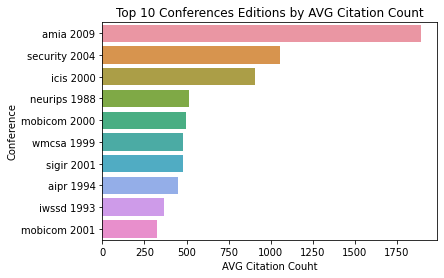

In [17]:
citations_top10_avg = {k:v for k,v in df_single_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_avg_plot = sns.barplot(x=list(citations_top10_avg.values()), y=list(citations_top10_avg.keys()))

plt.title("Top 10 Conferences Editions by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Couht")
plt.savefig(path_file_export + 'charts/conf_editions_cit_avg_top_10.png')

#### Top 10 Considerations
We can notice that the Top 10 Classification by total citations number is different from the Top 10 Classification by the AVG citations. 

It could be interesting to understand the density of the number of articles of each conference.

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


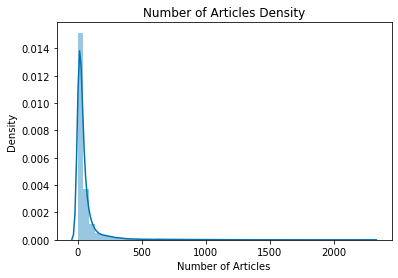

In [18]:
article_by_conference_plot = sns.distplot([v for k,v in single_conference_count_article.items()])
avg_article_by_conference = sum([v for k,v in single_conference_count_article.items()]) / len(single_conference_count_article)

plt.title("Number of Articles Density")
plt.xlabel("Number of Articles")
plt.savefig(path_file_export + 'charts/conf_articles_density.png')

In [19]:
print(f"AVG Articles by conference: {avg_article_by_conference}")

AVG Articles by conference: 58.46580350342727


We can notice that there's a really small number of conferences with a huge number of articles. However, the most of the conferences are in the 10-200 articles range.

### Conferences Evolution Analysis
We're going to study the evolution of a conferences in its editions.

#### AVG Citations of the Conferences
AVG Citation calculated over all the editions of a conference, without considering the year.

In [20]:
conference_tot_cit = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.sum()
conference_tot_article = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count()
avg_cit_for_conference = {key:(int(val) / int(conference_tot_article[key])) for key, val in conference_tot_cit.items()}

conference = {k: [v, avg_cit_for_conference[k], conference_tot_article[k]] for k, v in conference_tot_cit.items()}
df_conference = pd.DataFrame(data=conference.values(), index=conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_conference = df_conference.sort_values(['AVG Citations'], ascending=False)

df_conference.head(10)

,Total Citations,AVG Citations,N. of Articles
neurips,1033,516.500000,2
amia,3861,351.000000,11
wsna,4641,309.400000,15
mobidata,4202,182.695652,23
avmfss,111,111.000000,1
security,1359,104.538462,13
banff,309,103.000000,3
fosad,487,81.166667,6
avc,5968,77.506494,77
hotpower,306,76.500000,4


#### Top 10 Conferences by Citation Count

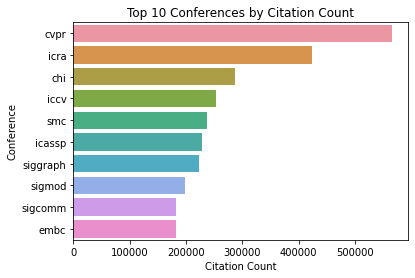

In [21]:
citations_top10_conference_by_cit = {k:v for k,v in df_conference['Total Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_cit_plot = sns.barplot(x = list(citations_top10_conference_by_cit.values()), y = list(citations_top10_conference_by_cit.keys()))

plt.title("Top 10 Conferences by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_top_10.png')

#### Top 10 Conferences by AVG Citation Count

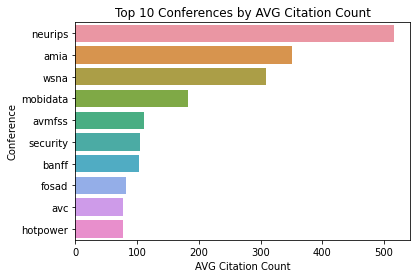

In [22]:
citations_top10_conference_by_avg_cit = {k:v for k,v in df_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_avg_cit_plot = sns.barplot(x = list(citations_top10_conference_by_avg_cit.values()), y = list(citations_top10_conference_by_avg_cit.keys()))

plt.title("Top 10 Conferences by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10.png')

### Study of the Evolution of the Conferences

The study of the evolution of the conferences is one of the most important factors that we need to study for correctly understanding the correlation between the obtained citations and the conference location of a given year.

#### Creation of the Support Structures

**Creation of the dataframe with Total Citations and AVG Citations for each year**

In [23]:
lst_dataframes = []
conference_tot_cit = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.sum()
conference_tot_article = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.count()
keys = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count().keys()

for conference in keys:
    single_conference = {}
    tot_cit = 0
    tot_article = 0
    n_editions = 0

    for k, v in conference_tot_cit[conference].items():
        single_conference[str(k) + ' - Total Citations'] = v   # totoal citations for each conference year
        single_conference[str(k) + ' - AVG Citations'] = v / conference_tot_article[conference][k] # avg citations for each conference year
        tot_cit += v #calcolo cit totali
        tot_article += conference_tot_article[conference][k]  # total number of articles for each conference
        n_editions += 1 # number of conference editions for each conference
    single_conference['Total Citations'] = tot_cit
    single_conference['AVG Citations'] = tot_cit / tot_article
    single_conference['N. of Editions'] = n_editions

    # each dataframe contains a conference
    lst_dataframes.append(pd.DataFrame(data = [single_conference.values()], index = [conference], columns = single_conference.keys()))

# creation of the final dataframe
df_conf_evolution = pd.concat(lst_dataframes)

# column and row sort
df_conf_evolution = df_conf_evolution.reindex(sorted(df_conf_evolution.columns), axis=1)
df_conf_evolution = df_conf_evolution.sort_values(['N. of Editions'], ascending=False)

df_conf_evolution

,1981 - AVG Citations,1981 - Total Citations,1982 - AVG Citations,1982 - Total Citations,1983 - AVG Citations,1983 - Total Citations,1984 - AVG Citations,1984 - Total Citations,1985 - AVG Citations,1985 - Total Citations,1986 - AVG Citations,1986 - Total Citations,1987 - AVG Citations,1987 - Total Citations,1988 - AVG Citations,1988 - Total Citations,1989 - AVG Citations,1989 - Total Citations,1990 - AVG Citations,1990 - Total Citations,1991 - AVG Citations,1991 - Total Citations,1992 - AVG Citations,1992 - Total Citations,1993 - AVG Citations,1993 - Total Citations,1994 - AVG Citations,1994 - Total Citations,1995 - AVG Citations,1995 - Total Citations,1996 - AVG Citations,1996 - Total Citations,1997 - AVG Citations,1997 - Total Citations,1998 - AVG Citations,1998 - Total Citations,1999 - AVG Citations,1999 - Total Citations,2000 - AVG Citations,2000 - Total Citations,2001 - AVG Citations,2001 - Total Citations,2002 - AVG Citations,2002 - Total Citations,2003 - AVG Citations,2003 - Total Citations,2004 - AVG Citations,2004 - Total Citations,2005 - AVG Citations,2005 - Total Citations,2006 - AVG Citations,2006 - Total Citations,2007 - AVG Citations,2007 - Total Citations,2008 - AVG Citations,2008 - Total Citations,2009 - AVG Citations,2009 - Total Citations,2010 - AVG Citations,2010 - Total Citations,2011 - AVG Citations,2011 - Total Citations,2012 - AVG Citations,2012 - Total Citations,2013 - AVG Citations,2013 - Total Citations,2014 - AVG Citations,2014 - Total Citations,2015 - AVG Citations,2015 - Total Citations,2016 - AVG Citations,2016 - Total Citations,2017 - AVG Citations,2017 - Total Citations,AVG Citations,N. of Editions,Total Citations
icalp,13.405405,496.0,22.128205,863.0,12.352941,630.0,9.166667,385.0,10.575000,423.0,11.024390,452.0,10.111111,455.0,11.022727,485.0,19.404762,815.0,30.929825,1763.0,14.672414,851.0,17.818182,980.0,7.666667,345.0,7.568627,386.0,7.960000,398.0,12.963636,713.0,11.885714,832.0,14.146667,1061.0,13.838710,858.0,14.150685,1033.0,14.000000,1162.0,17.977273,1582.0,15.329412,1303.0,14.107527,1312.0,21.525926,2906.0,22.652174,2605.0,10.558442,813.0,2.500000,5.0,15.327273,1686.0,6.000000,12.0,10.045455,1105.0,7.801653,944.0,7.325000,879.0,3.666667,11.0,6.240000,780.0,1.000000,1.0,1.678571,47.0,13.466524,37,31377
stoc,26.463415,1085.0,46.133333,2076.0,40.211538,2091.0,26.234375,1679.0,32.431373,1654.0,40.446809,1901.0,82.940000,4147.0,82.649123,4711.0,58.440678,3448.0,48.000000,2832.0,34.947368,1992.0,22.764706,1935.0,28.165217,3239.0,27.642857,2322.0,24.243478,2788.0,59.788732,4245.0,50.300000,4527.0,67.283784,4979.0,25.928571,2178.0,42.441860,3650.0,43.771084,3633.0,35.526316,3375.0,28.025000,2242.0,43.360000,3252.0,38.529412,3275.0,27.962025,2209.0,30.480519,2347.0,42.785714,3594.0,60.371795,4709.0,27.308642,2212.0,26.506024,2200.0,25.267442,2173.0,27.687500,2658.0,23.700000,2133.0,18.450549,1679.0,14.247191,1268.0,10.540816,1033.0,35.779619,37,101471
sigmetrics,4.698113,249.0,4.692308,244.0,6.173913,142.0,7.710526,293.0,9.450000,378.0,7.750000,186.0,5.928571,83.0,11.023256,474.0,10.023256,431.0,15.119403,1013.0,10.085106,474.0,9.333333,532.0,13.500000,1053.0,15.734375,1007.0,12.776119,856.0,22.683333,1361.0,17.384615,904.0,27.070000,2707.0,16.527027,1223.0,28.329545,2493.0,17.415094,1846.0,20.021978,1822.0,24.806452,2307.0,19.400000,2328.0,21.734694,1065.0,10.578125,677.0,17.782609,2045.0,12.661871,1760.0,31.655172,2754.0,13.024000,1628.0,17.651852,2383.0,16.809524,706.0,11.491525,1356.0,10.989691,2132.0,7.333333,1012.0,6.158416,622.0,4.653333,349.0,14.914812,37,42895
sigmod,23.406250,749.0,12.511111,563.0,9.400000,376.0,105.787879,3491.0,20.972222,755.0,36.369863,2655.0,29.325843,2610.0,20.257576,1337.0,33.590000,3359.0,50.183673,4918.0,20.825000,2499.0,19.596774,2430.0,66.155689,11048.0,29.382166,4613.0,37.679739,5765.0,47.123377,7257.0,55.756410,8698.0,51.134078,9153.0,39.198864,6899.0,81.944785,13357.0,38.402174,7066.0,57.141791,7657.0,61.381579,9330.0,47.956989,8920.0,73.436364,12117.0,47

**Total Citations Dataframe**

Since we need to study the evolution of the conferences, we're going to remove the conferences that only have one edition and without citations.

In [24]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k, v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v 
        n_editions += 1
        
    if n_editions > 1 and df_conf_evolution.loc[conference]['Total Citations'] > 0:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_cit_evolution = pd.concat(lst_dataframes)

df_cit_evolution = df_cit_evolution.reindex(sorted(df_cit_evolution.columns), axis=1)
df_cit_evolution.head(10)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,90.0,60.0,109.0,21.0,84.0,NaN,61.0,NaN,74.0,NaN,56.0,NaN,55.0,173.0,154.0,36.0,7.0,13.0,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,2.0
3dimpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574.0,913.0,NaN,NaN,NaN,NaN,NaN
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954.0,NaN,1047.0,NaN,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv-con,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,576.0,329.0,423.0,359.0,128.0,NaN,148.0,74.0,39.0,44.0
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.0,318.0,240.0,290.0,338.0,NaN,352.0,340.0,431.0,243.0,350.0,336.0
3dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.0,543.0,389.0,NaN,687.0
3pgcic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,214.0,140.0,NaN,219.0,307.0,80.0,85.0


**AVG Citations Dataframe.**

Since we need to study the evolution of the conferences, we're going to remove the conferences that only have one edition and without citations.

In [25]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v / conference_tot_article[conference][k] 
        n_editions += 1
    
    if n_editions > 1 and df_conf_evolution.loc[conference]['Total Citations'] > 0:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_avg_cit_evolution = pd.concat(lst_dataframes)

df_avg_cit_evolution = df_avg_cit_evolution.reindex(sorted(df_avg_cit_evolution.columns), axis=1)
df_avg_cit_evolution.head(10)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3dic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.319444,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
3dica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272727,6.0,3.75,6.8125,1.909091,6.0,NaN,6.777778,NaN,3.894737,NaN,2.947368,NaN,3.437500,6.407407,5.133333,2.571429,1.750000,2.166667,NaN,NaN
3dim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,2.000000
3dimpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.714286,14.265625,NaN,NaN,NaN,NaN,NaN
3dor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.333333,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000
3dpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,9.184211,NaN,12.519685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3dtv-con,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,7.111111,6.580000,7.690909,5.983333,3.200000,NaN,3.288889,3.363636,2.600000,3.384615
3dui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.708333,14.454545,9.230769,10.740741,11.266667,NaN,9.513514,7.391304,10.775000,5.785714,7.000000,6.339623
3dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.058824,6.464286,5.984615,NaN,12.267857
3pgcic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.491525,4.280000,4.000000,NaN,3.128571,3.528736,2.162162,2.656250


**Dataframe of the Editions Over and Under the AVG**

First of all, we're going to create two lists for each conference:
* all the years with AVG Citations over the total AVG
* all the years with AVG Citations under the total AVG

In [26]:
dict_over_and_under_avg_cit = {}

for row, col in df_avg_cit_evolution.iterrows():
    list_over_avg = []
    list_under_avg = []

    for k, v in col.items():
        if not math.isnan(v):
            if(v >= df_conference.at[row, 'AVG Citations']):
                list_over_avg.append(k)
            else:
                list_under_avg.append(k)

    tmp_dict = {}
    tmp_dict['Editions Over the AVG'] = list_under_avg
    tmp_dict['Editions Under the AVG'] = list_over_avg

    dict_over_and_under_avg_cit[row] = tmp_dict

Now we're able to compute the percentage of the editions under the average. This is going to allow us to analyze extremes (the conferences with the highest and the lowest percentages); those are the most significant for our purposes.

In [27]:
lst_df = []
for k,v in dict_over_and_under_avg_cit.items():
    v['% Editions Under the AVG'] = (len(v['Editions Under the AVG']) / df_conf_evolution.at[k, 'N. of Editions']) * 100
    lst_df.append(pd.DataFrame(data=[v.values()], index = [k], columns=v.keys()))
      
df_over_and_under_avg_cit = pd.concat(lst_df)
df_over_and_under_avg_cit = df_over_and_under_avg_cit.sort_values(['% Editions Under the AVG'], ascending=False)

df_over_and_under_avg_cit

,Editions Over the AVG,Editions Under the AVG,% Editions Under the AVG
issoc,[],"[2007, 2012]",100.000000
ceig,[],"[2014, 2016, 2017]",100.000000
ipta,[],"[2010, 2017]",100.000000
ejc,[],"[2009, 2010, 2013, 2014, 2016, 2017]",100.000000
smt,[],"[2012, 2013]",100.000000
...,...,...,...
tamc,"[2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]",[2008],11.111111
security,"[1998, 1999, 2000, 2001, 2003, 2005, 2011, 201...",[2004],10.000000
ipcc,"[1998, 2000, 2008, 2010, 2011, 2013, 2014, 201...",[2012],9.090909
uc,"[2005, 2006, 2007, 2008, 2010, 2011, 2013, 201...",[2012],8.333333


**Dictionary with the Year and Total Citations of the Year**

It's useful to semplify the creation of the next graphs

In [28]:
dict_cit_conference = {}
for row,col in df_cit_evolution.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_cit_conference[row] = x

**Dictionary with the Year and AVG Citations of the Year**

It's useful to semplify the creation of the next graphs

In [29]:
dict_avg_cit_conference = {}
for row,col in df_avg_cit_evolution.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_avg_cit_conference[row] = x

#### Creation of the Plotting Functions

**Plot of the Total Citations for each Year of a given Conference**

In [30]:
def draw_tot_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_cit_conference[conf_name].keys()), y=list(dict_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name.upper())
    plot.set(xlabel='Year', ylabel='Total Citation Number')
    
    plt.savefig(path_file_export + f'charts/example_tot_{conf_name}.png')

**Plot of the AVG Citations for each Year of a given Conference**

In [31]:
def draw_avg_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_avg_cit_conference[conf_name].keys()), y=list(dict_avg_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name.upper())
    plot.set(xlabel='Year', ylabel='Average Citation Number')
    plot.axhline(df_conference.at[conf_name, 'AVG Citations'], ls='--')
    
    plt.savefig(path_file_export + f'charts/example_avg_{conf_name}.png')

#### Analysis of the Conferences Over and Under the AVG
Now we can study these conferences for understandig why some of them distinguish between the other

In [32]:
top10_num_editions = {k:v for k, v in df_conf_evolution['N. of Editions'].sort_values(ascending=False).head(10).items()}

print('TOP 10 Total Citation: ' + str(list(citations_top10_conference_by_cit.keys())) + "\n")
print('TOP 10 Average Citation: ' + str(list(citations_top10_conference_by_avg_cit.keys())) + "\n")
print('TOP 10 Number of Editions: ' + str(list(top10_num_editions.keys())))

TOP 10 Total Citation: ['cvpr', 'icra', 'chi', 'iccv', 'smc', 'icassp', 'siggraph', 'sigmod', 'sigcomm', 'embc']

TOP 10 Average Citation: ['neurips', 'amia', 'wsna', 'mobidata', 'avmfss', 'security', 'banff', 'fosad', 'avc', 'hotpower']

TOP 10 Number of Editions: ['icalp', 'popl', 'siggraph', 'focs', 'stoc', 'sigmod', 'sigmetrics', 'sigcse', 'isca', 'acl']


**Plot of some of the conferences with the highest Total Citations**

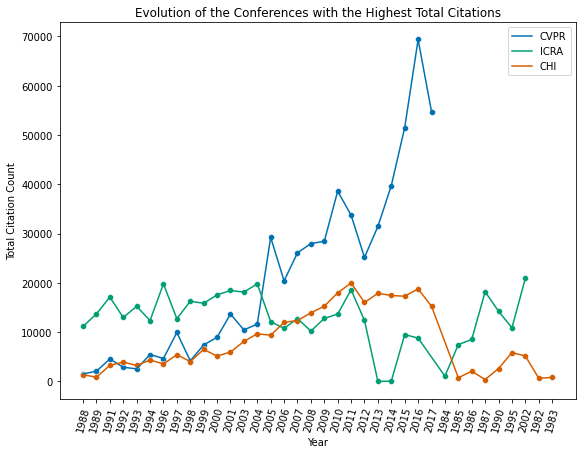

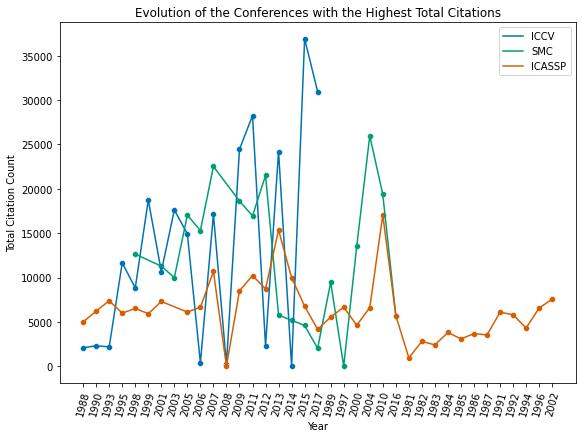

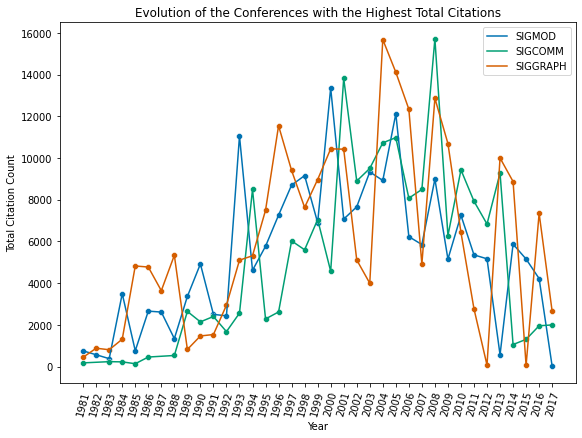

In [33]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()), label='icra'.upper())
sns.lineplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()), label='chi'.upper())
sns.scatterplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()))
sns.scatterplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()), label='iccv'.upper())
sns.lineplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()), label='smc'.upper())
sns.lineplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()), label='icassp'.upper())
sns.scatterplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()))
sns.scatterplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()))
sns.scatterplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()), label='sigmod'.upper())
sns.lineplot(x=list(dict_cit_conference['sigcomm'].keys()), y=list(dict_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()), label='siggraph'.upper())
sns.scatterplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()))
sns.scatterplot(x=list(dict_cit_conference['sigcomm'].keys()), y=list(dict_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_a.png')

**Plot of the AVG Citations with the Conferences with the highest Citations**

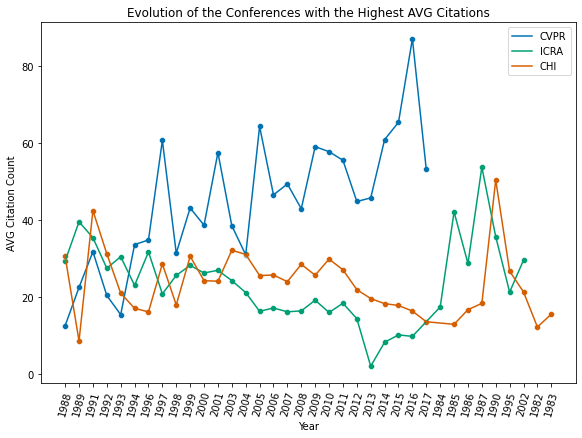

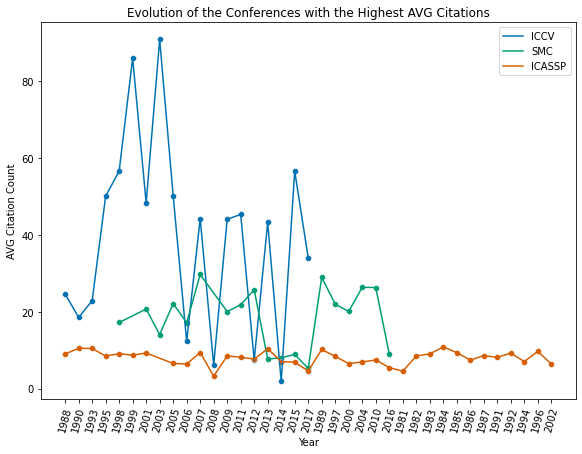

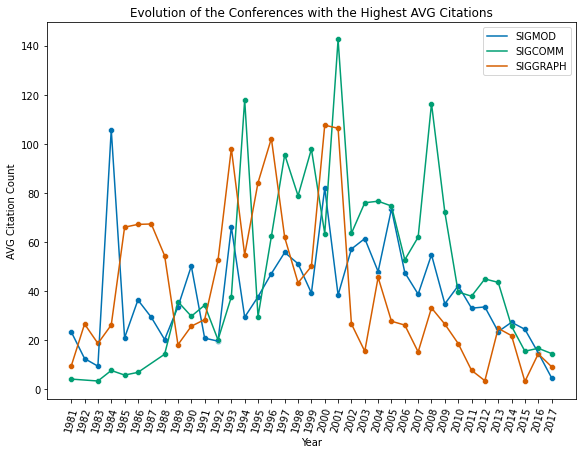

In [34]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['icra'].keys()), y=list(dict_avg_cit_conference['icra'].values()), label='icra'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['chi'].keys()), y=list(dict_avg_cit_conference['chi'].values()), label='chi'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['icra'].keys()), y=list(dict_avg_cit_conference['icra'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['chi'].keys()), y=list(dict_avg_cit_conference['chi'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()), label='iccv'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['smc'].keys()), y=list(dict_avg_cit_conference['smc'].values()), label='smc'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['icassp'].keys()), y=list(dict_avg_cit_conference['icassp'].values()), label='icassp'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['smc'].keys()), y=list(dict_avg_cit_conference['smc'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['icassp'].keys()), y=list(dict_avg_cit_conference['icassp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['sigmod'].keys()), y=list(dict_avg_cit_conference['sigmod'].values()), label='sigmod'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['siggraph'].keys()), y=list(dict_avg_cit_conference['siggraph'].values()), label='siggraph'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['sigmod'].keys()), y=list(dict_avg_cit_conference['sigmod'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['siggraph'].keys()), y=list(dict_avg_cit_conference['siggraph'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_a.png')

**Plot of some of the conferences with the highest AVG Citations**

**Note**: since some of the conferences in our top 10 only have one edition, we're going to compute a new top 10 for only the conferences that have at least a specified number of editions.

In [35]:
minimum_number_of_editions = 5

TOP 10 Average Citation: ['amia', 'security', 'mobicom', 'sosp', 'gcb', 'ismb', 'eurocrypt', 'crypto', 'sp', 'sigcomm']



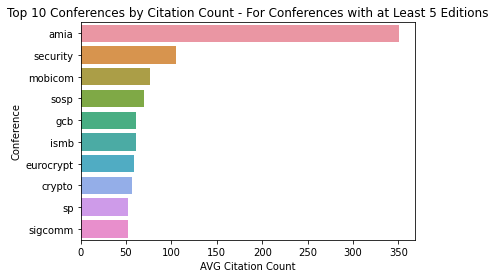

In [36]:
# df with the conferences that have at least n editions
conf_with_at_least_n_editions = list()

for index, row in df_conf_evolution.iterrows():
    if(row['N. of Editions'] >= minimum_number_of_editions):
        conf_with_at_least_n_editions.append(index)

df_conference_with_more_editions = df_conference.loc[conf_with_at_least_n_editions]

citations_top10_conference_with_more_editions_by_avg_cit = {k:v for k,v in df_conference_with_more_editions['AVG Citations'].sort_values(ascending=False).head(10).items()}

sns.barplot(x = list(citations_top10_conference_with_more_editions_by_avg_cit.values()), y = list(citations_top10_conference_with_more_editions_by_avg_cit.keys()))
plt.title(f"Top 10 Conferences by Citation Count - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10_with_at_least_n_editions.png')

print('TOP 10 Average Citation: ' + str(list(citations_top10_conference_with_more_editions_by_avg_cit.keys())) + "\n")

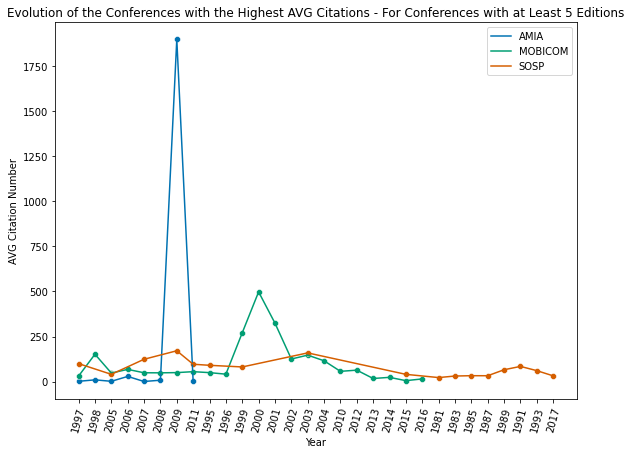

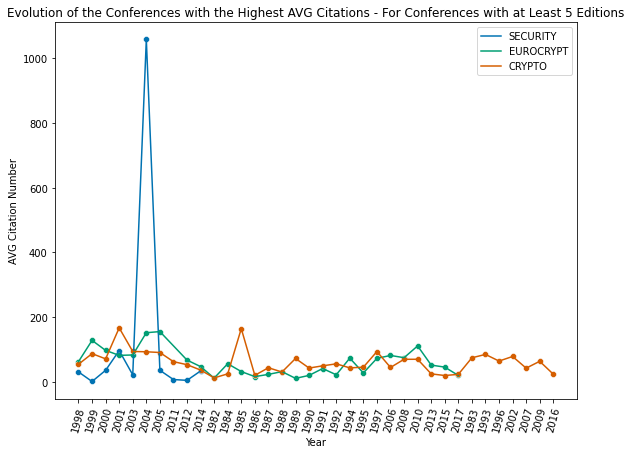

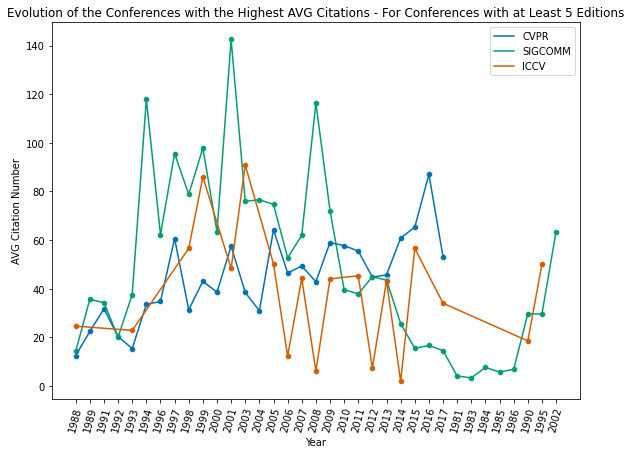

In [37]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()), label='amia'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()), label='mobicom'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()), label='sosp'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()), label='security'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()), label='eurocrypt'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['crypto'].keys()), y=list(dict_avg_cit_conference['crypto'].values()), label='crypto'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['crypto'].keys()), y=list(dict_avg_cit_conference['crypto'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()), label='iccv'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_a.png')

**Single Plots for Total Citation Number**

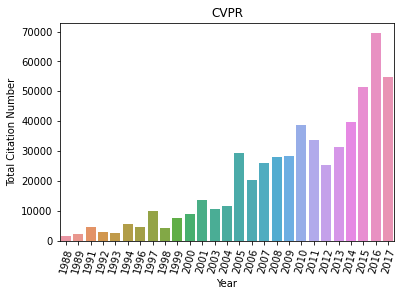

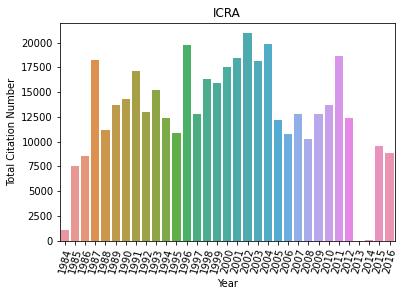

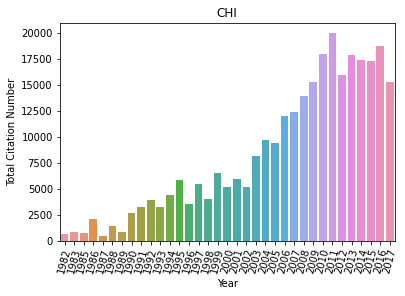

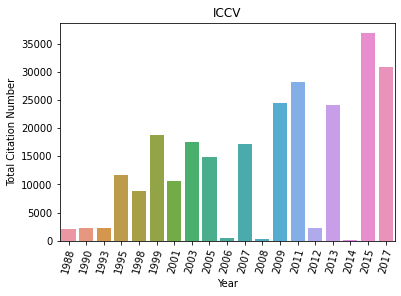

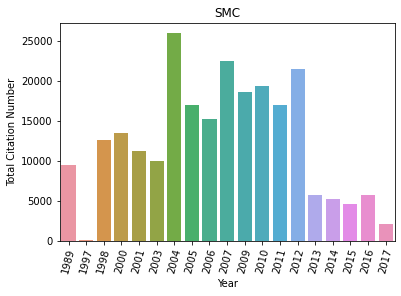

In [38]:
for key in list(citations_top10_conference_by_cit.keys())[0:5]:
    plt.figure(key)
    draw_tot_cit_graph(key)

**Single Plots for AVG Citation Number**

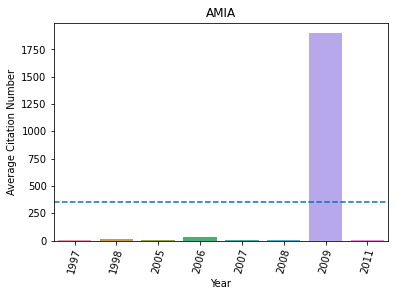

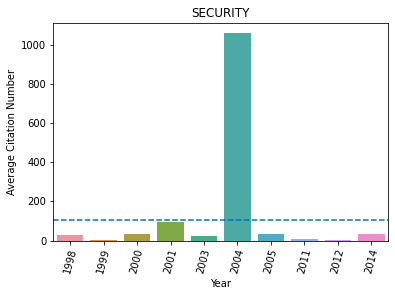

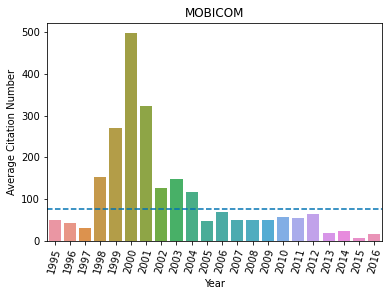

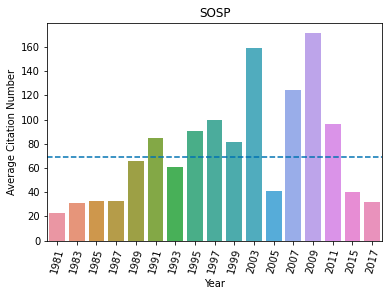

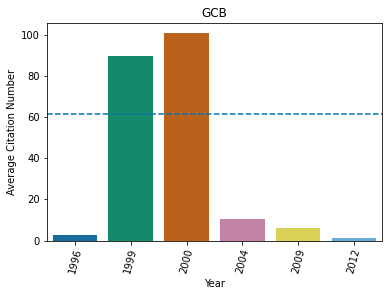

In [39]:
for key in list(citations_top10_conference_with_more_editions_by_avg_cit.keys())[0:5]:
    plt.figure(key)
    draw_avg_cit_graph(key)

**Single Plots for Conferences with a High Percentage of Editions Under the AVG**

The following flag is useful to prevent the print of conferences with AVG citations equal to 1 for every year.

In [40]:
print_only_conf_with_avg_not_equal_to_one = True

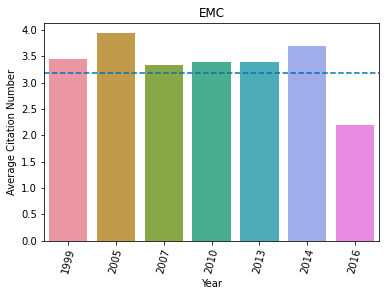

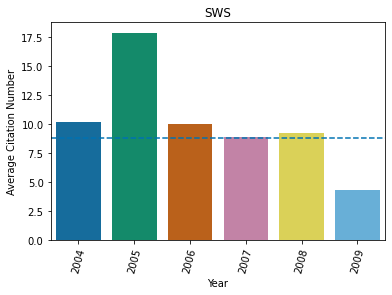

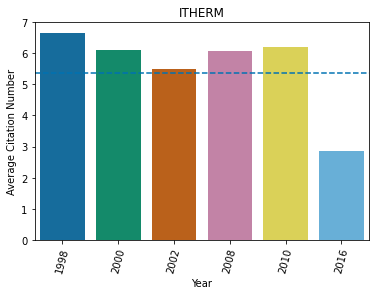

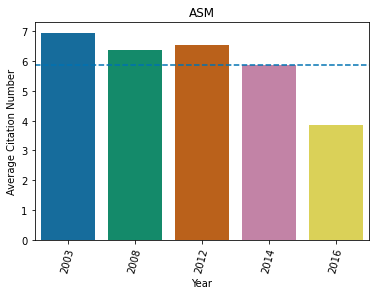

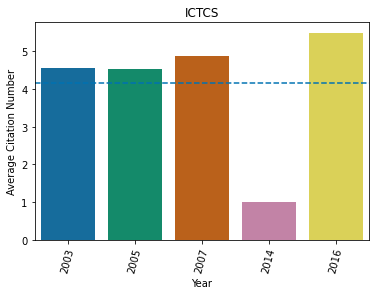

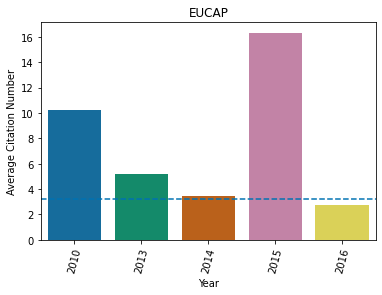

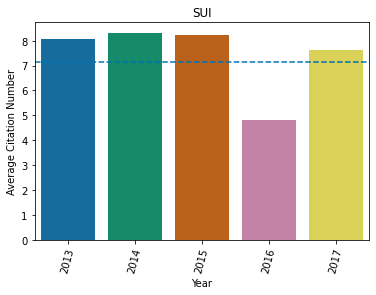

In [41]:
max_plots = 10
plot_count = 0

for row, col in list(df_over_and_under_avg_cit.iterrows())[0:30]:
    if(df_conf_evolution.at[row, 'N. of Editions'] >= minimum_number_of_editions):
        
        if print_only_conf_with_avg_not_equal_to_one and plot_count < max_plots:
            for avg_year_citations in list(dict_avg_cit_conference[row].values()):
                if avg_year_citations != 1.0:
                    plt.figure(row)
                    draw_avg_cit_graph(row)
                    plot_count += 1
                    break

        else:
            plt.figure(row)
            draw_avg_cit_graph(row)

#### Some Interesting Observations
We can already make some observations looking at these graphs.

We can easily notice that usually there are **huge differences between the different editions of a conferences**. This datum is really interesting since it will help us choice which year and conferences to consider for our analysis.

Another interesting datum is that some conferences have a really huge Total AVG Citation number, but **the AVG Citation is high only for a single year**. Maybe that was a pretty profitable year, or maybe it's simply an abnormal year for which we haven't enough data (example: a single article with a lot of citations could cause the AVG value to reach that level).
**These conferences could be a problem for our analysis**. We have to keep an eye on them.

#### Study of the Conferences with the Biggest Difference Between the Best and the Worst Year
This could be helpful to obtain other interesting cases for the next analysis.

**Creation of the support dataframe**

In [42]:
# creation of a dataframe that contains for each conference the year with the most and the least total and avg citations


# year with the most total citations
year_with_max_cit = {k:v for k,v in df_cit_evolution.idxmax(axis=1).items()}
df_year_with_max_cit = pd.DataFrame(data=year_with_max_cit.values(), index=year_with_max_cit.keys(), columns=['Year with MAX Total Citations'])

# year with the most total citations
max_cit = {k:v for k,v in df_cit_evolution.max(axis=1).items()}
df_max_cit = pd.DataFrame(data=max_cit.values(), index=max_cit.keys(), columns=['MAX Total Citations'])

# year with the least total citations
year_with_min_cit = {k:v for k,v in df_cit_evolution.idxmin(axis=1).items()}
df_year_with_min_cit = pd.DataFrame(data=year_with_min_cit.values(), index=year_with_min_cit.keys(), columns=['Year with MIN Total Citations'])

# value of the year with the least total citations
min_cit = {k:v for k,v in df_cit_evolution.min(axis=1).items()}
df_min_cit = pd.DataFrame(data=min_cit.values(), index=min_cit.keys(), columns=['MIN Total Citations'])


# year with the most avg citations
year_with_max_avg_cit = {k:v for k,v in df_avg_cit_evolution.idxmax(axis=1).items()}
df_year_with_max_avg_cit = pd.DataFrame(data=year_with_max_avg_cit.values(), index=year_with_max_avg_cit.keys(), columns=['Year with MAX AVG Citations'])

# year with the most avg citations
max_avg_cit = {k:v for k,v in df_avg_cit_evolution.max(axis=1).items()}
df_max_avg_cit = pd.DataFrame(data=max_avg_cit.values(), index=max_avg_cit.keys(), columns=['MIN AVG Citations'])

# year with the least avg citations
year_with_min_avg_cit = {k:v for k,v in df_avg_cit_evolution.idxmin(axis=1).items()}
df_year_with_min_avg_cit = pd.DataFrame(data=year_with_min_avg_cit.values(), index=year_with_min_avg_cit.keys(), columns=['Year with MIN AVG Citations'])

# value of the year with the least avg citations
min_avg_cit = {k:v for k,v in df_avg_cit_evolution.min(axis=1).items()}
df_min_avg_cit = pd.DataFrame(data=min_avg_cit.values(), index=min_avg_cit.keys(), columns=['MIN AVG Citations'])


# difference between min and max values
dif_cit = {k: (max_cit[k] - v)  for k,v in min_cit.items()}
df_dif_cit = pd.DataFrame(data=dif_cit.values(), index=dif_cit.keys(), columns=['MAX-MIN Total Citations Difference'])
dif_avg_cit = {k: (max_avg_cit[k] - v)  for k, v in min_avg_cit.items()}
df_dif_avg_cit = pd.DataFrame(data=dif_avg_cit.values(), index=dif_avg_cit.keys(), columns=['MAX-MIN AVG Citations Difference'])

# creation of the final dataframe
df_min_max = pd.concat([df_year_with_min_avg_cit, df_min_avg_cit, df_year_with_max_avg_cit, df_max_avg_cit, 
                       df_year_with_min_cit, df_min_cit, df_year_with_max_cit, df_max_cit, df_dif_avg_cit, df_dif_cit],axis=1)
df_min_max = df_min_max.sort_values(['MAX-MIN AVG Citations Difference'], ascending=False)

df_min_max.head(10)

,Year with MIN AVG Citations,MIN AVG Citations,Year with MAX AVG Citations,MIN AVG Citations,Year with MIN Total Citations,MIN Total Citations,Year with MAX Total Citations,MAX Total Citations,MAX-MIN AVG Citations Difference,MAX-MIN Total Citations Difference
amia,2007,1.000000,2009,1896.000000,2007,1.0,2009,3792.0,1895.000000,3791.0
security,1999,1.500000,2004,1058.000000,1999,3.0,2004,1058.0,1056.500000,1055.0
icis,1999,1.000000,2000,909.000000,1999,1.0,2007,1821.0,908.000000,1820.0
mobicom,2015,5.619048,2000,497.464286,2015,236.0,2000,13929.0,491.845238,13693.0
wmcsa,2003,6.677419,1999,481.000000,2006,145.0,1999,5772.0,474.322581,5627.0
aipr,2014,2.760000,1994,452.000000,2007,49.0,1994,452.0,449.240000,403.0
iwssd,1989,7.722222,1993,364.000000,1989,556.0,1993,1092.0,356.277778,536.0
fast,2017,1.000000,2008,321.000000,2017,1.0,2009,396.0,320.000000,395.0
icml,1998,2.000000,1997,249.500000,1998,2.0,2006,10544.0,247.500000,10542.0
ecis,1996,1.000000,2012,237.500000,1996,1.0,2012,475.0,236.500000,474.0


**Plots of the Total Citations of the Conferences with the Most Difference Between the Best and Worst Years**

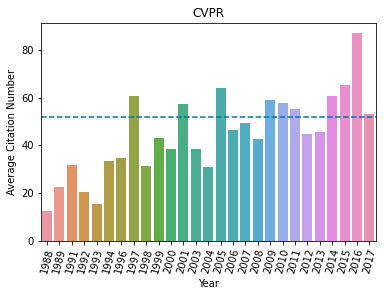

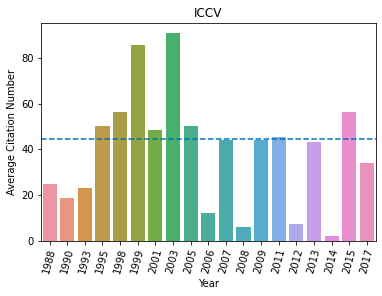

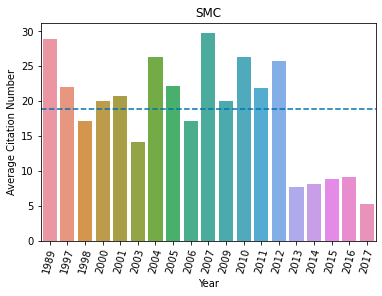

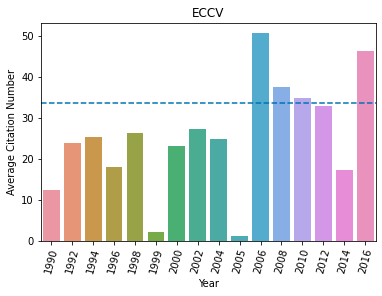

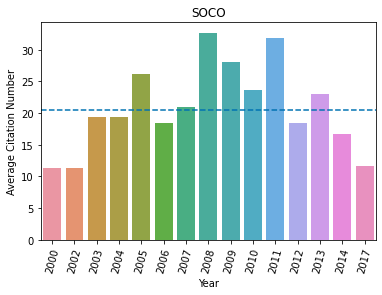

In [43]:
df_min_max_by_total_cit = df_min_max.sort_values(['MAX-MIN Total Citations Difference'], ascending=False)

for row,col in list(df_min_max_by_total_cit.iterrows())[0:5]:
    plt.figure(row)
    draw_avg_cit_graph(row)

**Plots of the AVG Citations of the Conferences with the Most Difference Between the Best and Worst Years**

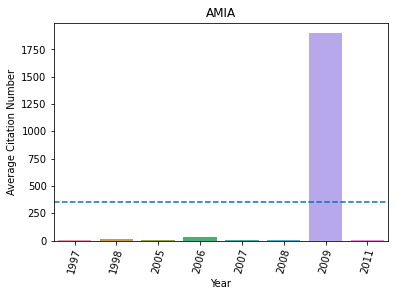

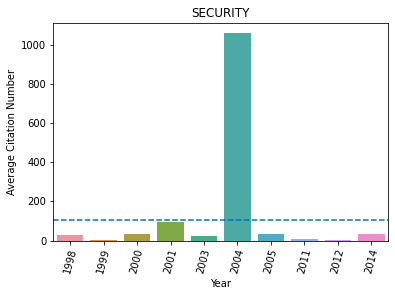

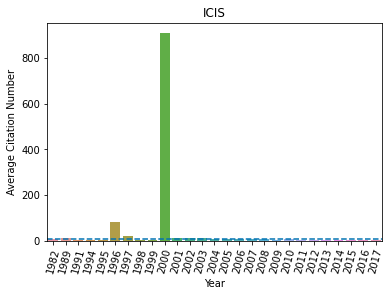

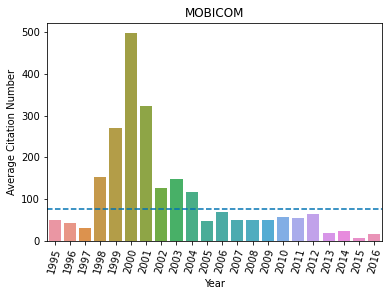

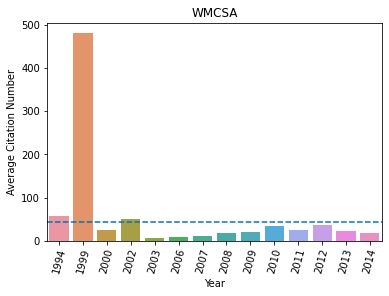

In [44]:
for row,col in list(df_min_max.iterrows())[0:5]:
    plt.figure(row)
    draw_avg_cit_graph(row)

#### Creation of a Dataframe with the Ratio Between the Yearly AVG Citations and the Total AVG Citations of a Conference

In [45]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k, v in conference_tot_cit[conference].items():
        avg_cit = v / conference_tot_article[conference][k]
        if(df_conf_evolution.at[conference, 'AVG Citations'] != 0):
            single_conference[str(k)] = avg_cit / df_conf_evolution.at[conference, 'AVG Citations']
        else:
            single_conference[str(k)] = 0
        n_editions +=1
    single_conference['Total AVG Citations'] = df_conf_evolution.at[conference, 'AVG Citations']
    
    # creation of a list of dataframes containing each different conference
    # filter of the conferences with only one edition since they're not useful 
    if n_editions > 1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

# creation of the final dataframe
df_ratio = pd.concat(lst_dataframes)
df_ratio = df_ratio.reindex(sorted(df_ratio.columns), axis=1)

# sort by total avg
df_ratio = df_ratio.sort_values(['Total AVG Citations'], ascending=False)

df_ratio.head(10)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total AVG Citations
amia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005698,0.028490,NaN,NaN,NaN,NaN,NaN,NaN,0.005698,0.082621,0.002849,0.022792,5.401709,NaN,0.002849,NaN,NaN,NaN,NaN,NaN,NaN,351.000000
security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296542,0.014349,0.344371,0.927888,NaN,0.210449,10.120677,0.344371,NaN,NaN,NaN,NaN,NaN,0.071744,0.047829,NaN,0.325239,NaN,NaN,NaN,104.538462
avc,NaN,NaN,NaN,NaN,NaN,NaN,0.102964,2.75957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.506494
mobicom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656286,0.545446,0.409926,1.994059,3.553787,6.529575,4.255357,1.647782,1.928994,1.518908,0.626669,0.893053,0.646441,0.642441,0.658323,0.751053,0.727096,0.837269,0.230677,0.313648,0.073754,0.199378,NaN,76.186323
osdi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.829755,NaN,NaN,NaN,NaN,NaN,1.219637,NaN,0.379090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106411,75.180000
wosn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129156,1.660398,NaN,NaN,0.243953,NaN,NaN,NaN,NaN,NaN,70.027027
sosp,0.326926,NaN,0.449695,NaN,0.47679,NaN,0.474317,NaN,0.951932,NaN,1.219562,NaN,0.879816,NaN,1.307361,NaN,1.441119,NaN,1.175871,NaN,NaN,NaN,2.298785,NaN,0.586544,NaN,1.790209,NaN,2.468877,NaN,1.392320,NaN,NaN,NaN,0.584335,NaN,0.464305,69.332703
icls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.830065,NaN,0.030501,NaN,1.174292,NaN,0.442266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.571429
iptps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.998885,NaN,0.269116,0.562472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.373494
gcb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045658,NaN,NaN,1.466322,1.641124,NaN,NaN,NaN,0.171217,NaN,NaN,NaN,NaN,0.097838,NaN,NaN,0.021742,NaN,NaN,NaN,NaN,NaN,61.325581


### Integration of Some Conference Ranking Metrics
The following part of this notebook contains the integration of some conference ranking metrics. These metrics could be another relevant way for finding interesting conferences or conferences editions that are going to be better analyzed later. 

#### GRIN Conference Rating Integration
The GRIN Rating is an initiative sponsored by GII (Group of Italian Professors of Computer Engineering), GRIN (Group of Italian Professors of Computer Science), and SCIE (Spanish Computer-Science Society).

**Creation of the Datasets Subsets with the GRIN Rating**

Unfortunately, at the time of the writing of this notebook, the GRIN Conference Rating is not available for every conference but only for the most famous and prestigious. For this reason, we need to filter all the conferences that doesn't have the rating.

In [46]:
df_conference_series_grin_rank = pd.read_csv(path_file_import + 'out_conference_series_with_grin_rank.csv', low_memory=False, index_col=[0])
df_conference_series_grin_rank.dropna(subset=["GrinClass", "GrinRating"], inplace=True)
df_conference_series_grin_rank

,ConferenceSeriesNormalizedName,GrinClass,GrinRating
0,disc,3.0,B
1,esa,2.0,A-
3,dexa,3.0,B
5,interact,3.0,B
6,fct,3.0,B-
...,...,...,...
4593,jelia,3.0,B-
4806,dbsec,3.0,B-
4861,lpar,3.0,B
5047,sirocco,3.0,B-


Inner join with the Total and AVG Citations dataframe

In [47]:
df_conference_with_grin_rank = pd.merge(left=df_conference, right=df_conference_series_grin_rank, left_on=df_conference.index, right_on="ConferenceSeriesNormalizedName", how="inner")
df_conference_with_grin_rank = df_conference_with_grin_rank.set_index(df_conference_with_grin_rank["ConferenceSeriesNormalizedName"].values).drop(columns=["ConferenceSeriesNormalizedName"])
df_conference_with_grin_rank

,Total Citations,AVG Citations,N. of Articles,GrinClass,GrinRating
neurips,1033,516.500000,2,1.0,A++
amia,3861,351.000000,11,2.0,A-
security,1359,104.538462,13,1.0,A++
mobicom,76872,76.186323,1009,1.0,A++
osdi,3759,75.180000,50,1.0,A+
...,...,...,...,...,...
fie,5326,3.179701,1675,3.0,B-
ecai,1097,2.812821,390,2.0,A-
ismir,23,2.555556,9,2.0,A
edm,698,2.258900,309,3.0,B


**Top 10 Conferences by Citation Count**

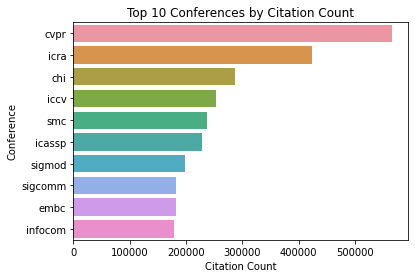

In [48]:
citations_top10_conference_with_grin_rank_by_cit = {k:v for k,v in df_conference_with_grin_rank['Total Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_with_grin_rank_by_cit_plot = sns.barplot(x = list(citations_top10_conference_with_grin_rank_by_cit.values()), y = list(citations_top10_conference_with_grin_rank_by_cit.keys()))

plt.title("Top 10 Conferences by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_top_10.png')

In [49]:
df_conference_with_grin_rank.sort_values(by="Total Citations", ascending=False).head(10)

,Total Citations,AVG Citations,N. of Articles,GrinClass,GrinRating
cvpr,566598,51.957634,10905,1.0,A++
icra,424429,22.637421,18749,2.0,A
chi,287549,21.958687,13095,1.0,A++
iccv,253928,44.548772,5700,1.0,A++
smc,237537,18.864120,12592,2.0,A-
icassp,228557,7.998215,28576,2.0,A
sigmod,197411,41.118725,4801,1.0,A++
sigcomm,181993,52.690504,3454,1.0,A++
embc,181957,9.236396,19700,2.0,A-
infocom,178972,24.346620,7351,1.0,A++


**Top 10 Conferences by AVG Citation Count**

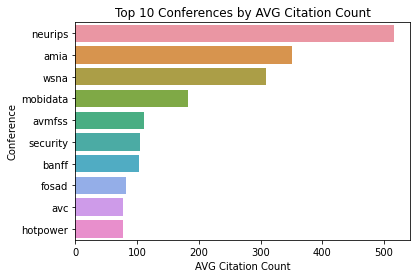

In [50]:
citations_top10_conference_with_grin_rank_by_avg_cit = {k:v for k,v in df_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_with_grin_rank_by_avg_cit_plot = sns.barplot(x = list(citations_top10_conference_with_grin_rank_by_avg_cit.values()), y = list(citations_top10_conference_with_grin_rank_by_avg_cit.keys()))

plt.title("Top 10 Conferences by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10.png')

In [51]:
df_conference_with_grin_rank.sort_values(by="AVG Citations", ascending=False).head(10)

,Total Citations,AVG Citations,N. of Articles,GrinClass,GrinRating
neurips,1033,516.500000,2,1.0,A++
amia,3861,351.000000,11,2.0,A-
security,1359,104.538462,13,1.0,A++
mobicom,76872,76.186323,1009,1.0,A++
osdi,3759,75.180000,50,1.0,A+
iclr,73,73.000000,1,1.0,A++
sosp,36677,69.332703,529,1.0,A++
iptps,5177,62.373494,83,2.0,A-
eurocrypt,64553,59.386385,1087,1.0,A++
crypto,109322,56.761163,1926,1.0,A++


**Top 10 Conferences by Number of Articles**

In [52]:
df_conference_with_grin_rank.sort_values(by="N. of Articles", ascending=False).head(25)

,Total Citations,AVG Citations,N. of Articles,GrinClass,GrinRating
icassp,228557,7.998215,28576,2.0,A
icc,151787,7.307640,20771,2.0,A
embc,181957,9.236396,19700,2.0,A-
icra,424429,22.637421,18749,2.0,A
icip,111191,7.604363,14622,2.0,A-
cdc,121066,8.391627,14427,2.0,A-
globecom,102105,7.683422,13289,2.0,A-
iros,141803,10.719912,13228,1.0,A+
chi,287549,21.958687,13095,1.0,A++
iscas,65552,5.118051,12808,2.0,A-


**Considerations About the GRIN Conference Rating**

The integration how the GRIN Conference Rating showed that the conferences with the most total citations and avg citations are not only the "top tier" conferences within the GRIN Rating System. In fact, in both the top 10s we can notice some middle tier (2nd class of 3) conferences.
The GRIN Rating is a complex metric, and of course it's not computed only on the Total and AVG Citations obtained by a conference. Ths result it's absolutely normal.

Another interesting consideration is about the number of articles: the conferences with the most Total and AVG Number of citations have really different number of published articles. However, the conferences with the most number of articles usually are part of the mid tier of the GRIN Rating System, with only some of them in the top one.

#### CORE Conference Ranking Integration
*The CORE Conference Ranking provides assessments of major conferences in the computing disciplines.The rankings are managed by the CORE Executive Committee, with periodic rounds for submission of requests for addition or reranking of conferences. Decisions are made by academic committees based on objective data requested as part of the submission process.* (source: CORE)

**Creation of the Datasets Subsets with the CORE Rating**

Unfortunately, at the time of the writing of this notebook, the CORE Conference Ranking is not available for every conference but only for the most famous and prestigious. For this reason, we need to filter all the conferences that doesn't have the rating.

In [53]:
df_conference_series_core_rank = pd.read_csv(path_file_import + 'out_conference_series_with_core_rank.csv', low_memory=False, index_col=[0])
df_conference_series_core_rank.dropna(inplace=True)

Column rename:

In [54]:
df_conference_series_core_rank.rename(columns={"CORE_2008_Rank": "2008 Rank", "CORE_2013_Rank": "2013 Rank", "CORE_2014_Rank": "2014 Rank", "CORE_2017_Rank": "2017 Rank", "CORE_2018_Rank": "2018 Rank", "CORE_2020_Rank": "2020 Rank", "CORE_2021_Rank": "2021 Rank", "ERA_2010_Rank": "2010 Rank"}, inplace=True)
df_conference_series_core_rank = df_conference_series_core_rank.reindex(sorted(df_conference_series_core_rank.columns), axis=1)

df_conference_series_core_rank

,2008 Rank,2010 Rank,2013 Rank,2014 Rank,2017 Rank,2018 Rank,2020 Rank,2021 Rank,ConferenceSeriesNormalizedName
0,A,A,A,A,A,A,A,A,disc
1,A,A,A,A,A,A,A,A,esa
3,A,B,B,B,B,B,B,B,dexa
5,A,A,A,A,A,A,A,B,interact
6,B,A,A,A,A,A,A,B,fct
...,...,...,...,...,...,...,...,...,...
4838,B,B,B,B,B,B,B,C,ifsa
4937,B,B,B,B,B,B,B,B,seta
5020,B,B,B,B,B,B,B,B,sirocco
5060,B,B,B,B,B,B,B,B,pacling


Inner join with the Total and AVG Citations dataframe

In [55]:
df_conference_with_core_rank = pd.merge(left=df_conference, right=df_conference_series_core_rank, left_on=df_conference.index, right_on="ConferenceSeriesNormalizedName", how="inner")
df_conference_with_core_rank = df_conference_with_core_rank.set_index(df_conference_with_core_rank["ConferenceSeriesNormalizedName"].values).drop(columns=["ConferenceSeriesNormalizedName"])
df_conference_with_core_rank

,Total Citations,AVG Citations,N. of Articles,2008 Rank,2010 Rank,2013 Rank,2014 Rank,2017 Rank,2018 Rank,2020 Rank,2021 Rank
neurips,1033,516.500000,2,A*,A,A*,A*,A*,A*,A*,A*
mobicom,76872,76.186323,1009,A*,A,A*,A*,A*,A*,A*,A*
osdi,3759,75.180000,50,A*,A,A*,A*,A*,A*,A*,A*
sosp,36677,69.332703,529,A*,A,A*,A*,A*,A*,A*,A*
eurocrypt,64553,59.386385,1087,A*,A,A*,A*,A*,A*,A*,A*
...,...,...,...,...,...,...,...,...,...,...,...
ecai,1097,2.812821,390,A,A,A,A,A,A,A,A
ecms,987,2.660377,371,B,B,B,B,B,B,B,B
pacling,67,2.576923,26,B,B,B,B,B,B,B,B
somet,197,2.373494,83,B,B,B,B,B,B,B,C


### Integration of the Conference Acceptance Rate
The following part of this notebook contains the integration of the conference acceptance rate. These metrics could be another relevant way for finding interesting conferences or conferences editions that are going to be better analyzed later. 

#### Creation of the Datasets Subsets with the Acceptance Rate

Unfortunately, at the time of the writing of this notebook, we don't have the Acceptance Rate for every conference but only for some of the most famous and prestigious (some conferences do not provide this kind of data). For this reason, we need to filter all the conferences that doesn't have this information.

In [56]:
df_conference_acceptance_rate = pd.read_csv(path_file_import + 'out_conference_acceptance_rate.csv', low_memory=False, index_col=[0])
df_conference_acceptance_rate.dropna()
df_conference_acceptance_rate

,ConferenceSeriesNormalizedName,Papers_Accepted,Papers_Perc_Accepted,Papers_Submitted,Year
0,crypto,60,26.4,227,2014
1,crypto,61,26.9,227,2013
2,crypto,48,21.3,225,2012
3,crypto,42,18.3,230,2011
4,crypto,39,19.3,202,2010
...,...,...,...,...,...
4741,srds,23,38.0,61,1995
4742,safecomp,33,38.0,86,2008
4743,policy,18,31.0,59,2006
4744,policy,20,22.0,90,2005


**Join with the Conferences Acceptance Rate Data**

In [57]:
# creation of the conference normalized name column (conf name + year) on the acceptance rate dataframe
df_conference_acceptance_rate['ConferenceNormalizedName'] = np.nan
df_conference_acceptance_rate['ConferenceNormalizedName'] = df_conference_acceptance_rate.ConferenceSeriesNormalizedName + ' ' + df_conference_acceptance_rate.Year.map(str)

df_conference_editions_with_acceptance_rate = pd.merge(left=df_single_conference, right=df_conference_acceptance_rate, left_on=df_single_conference.index, right_on="ConferenceNormalizedName", how="inner")
df_conference_editions_with_acceptance_rate = df_conference_editions_with_acceptance_rate.set_index(df_conference_editions_with_acceptance_rate["ConferenceNormalizedName"].values).drop(columns=["ConferenceNormalizedName"])
df_conference_editions_with_acceptance_rate

,Total Citations,AVG Citations,N. of Articles,ConferenceSeriesNormalizedName,Papers_Accepted,Papers_Perc_Accepted,Papers_Submitted,Year
mobicom 2000,13929,497.464286,28,mobicom,28,12.0,226,2000
mobicom 2001,9726,324.200000,30,mobicom,30,11.0,281,2001
mobihoc 2002,3892,176.909091,22,mobihoc,22,16.0,134,2002
crypto 2001,5516,167.151515,33,crypto,33,21.2,156,2001
eurocrypt 2005,5136,155.636364,33,eurocrypt,33,17.4,190,2005
...,...,...,...,...,...,...,...,...
gi 2016,1,1.000000,1,gi,26,42.0,62,2016
enc 2016,2,1.000000,2,enc,5,100.0,5,2016
enc 2016,2,1.000000,2,enc,5,100.0,5,2016
iceis 2005,2,1.000000,2,iceis,89,19.0,459,2005


#### Study of the Correlation Between the Acceptance Rate and the Number of Obtained Citations

First of all we need to define some useful functions

In [58]:
def kendall_pval(x,y):
    return stats.kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return stats.pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return stats.spearmanr(x,y)[1]

In [59]:
def print_correlation_heatmap(df, method='pearson'):
    assert method in ['pearson', 'kendall', 'spearman']
    
    computed_corr = df.corr(method=method)
    p_value = df.corr(method=pearsonr_pval)

    mask = np.triu(np.ones_like(computed_corr, dtype=float))

    f, ax = plt.subplots(figsize=(9, 7))

    cmap = sns.diverging_palette(230, 15, as_cmap=True)

    sns.heatmap(computed_corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va': 'bottom'})

    sns.heatmap(computed_corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar = False, annot = p_value, annot_kws = {'va': 'top'})

    
    plt.title(method[0].upper() + method[1:] + " Correlation")
    plt.savefig(path_file_export + 'charts/corr_heatmap_' + method + '.png')

    return computed_corr, p_value

**Pearson Correlation**

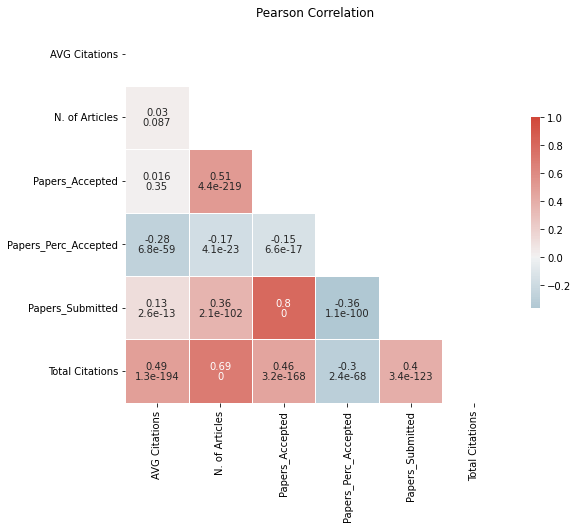

In [60]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_pearson, p_value_pearson = print_correlation_heatmap(df_support_no_year, method='pearson')

**Kendall Correlation**

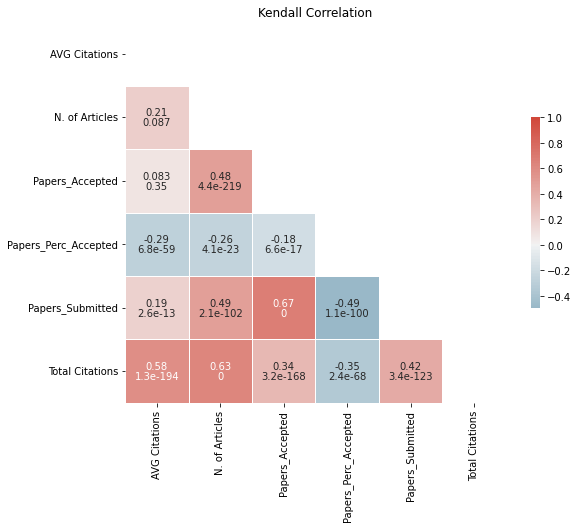

In [61]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_kendall, p_value_kendall = print_correlation_heatmap(df_support_no_year, method='kendall')

**Spearman Correlation**

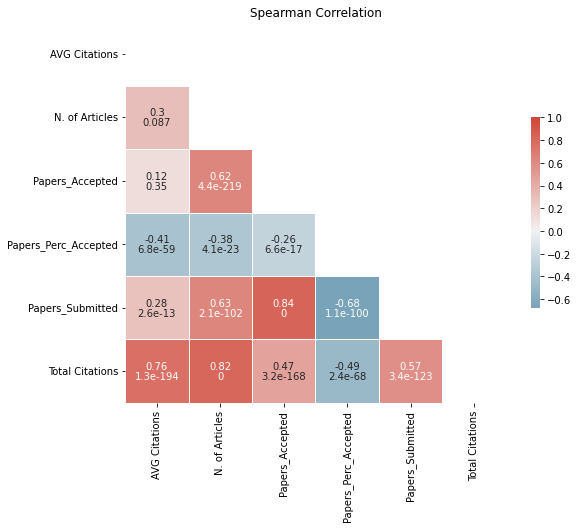

In [62]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_spearman, p_value_spearman = print_correlation_heatmap(df_support_no_year, method='spearman')

**Correlation Summary Plot**

The following plot contains only the relevant information, for a better readability.

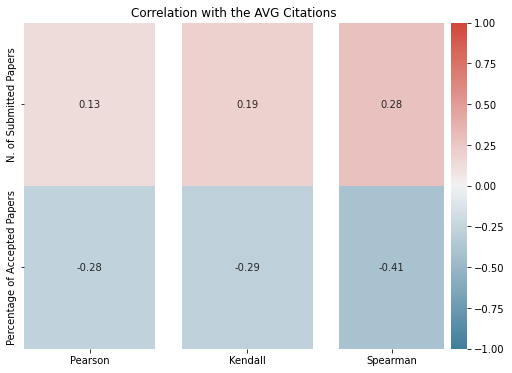

In [63]:
# Correlation values
_s = corr_spearman.rename({'AVG Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'AVG Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'AVG Citations': 'Pearson'}, axis=1)
#_s.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, axis=0, inplace=True)
#_k.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, axis=0, inplace=True)
#_p.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, axis=0, inplace=True)
#_s.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, inplace=True)
#_k.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, inplace=True)
#_p.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers'}, inplace=True)

#_p.drop(['AVG Citations', 'N. of Articles', 'Papers_Accepted', 'Papers_Submitted', 'Total Citations'], inplace=True)
#_s.drop(['AVG Citations', 'N. of Articles', 'Papers_Accepted', 'Papers_Submitted', 'Total Citations'], inplace=True)
#_k.drop(['AVG Citations', 'N. of Articles', 'Papers_Accepted', 'Papers_Submitted', 'Total Citations'], inplace=True)
_s.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_k.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_p.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_s.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_k.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_p.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)

_p.drop(['AVG Citations', 'N. of Articles', 'Total Citations', 'Papers_Accepted'], inplace=True)
_s.drop(['AVG Citations', 'N. of Articles', 'Total Citations', 'Papers_Accepted'], inplace=True)
_k.drop(['AVG Citations', 'N. of Articles', 'Total Citations', 'Papers_Accepted'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the AVG Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_p[['Pearson']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k[['Kendall']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_acceptance_rate.png')

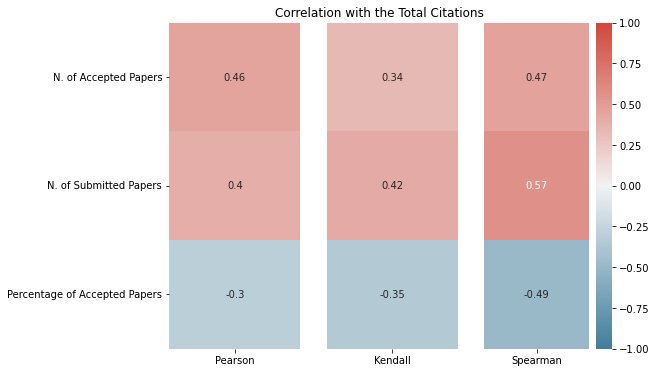

In [64]:
# Correlation values
_s = corr_spearman.rename({'Total Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'Total Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'Total Citations': 'Pearson'}, axis=1)
_s.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_k.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_p.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_s.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_k.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_p.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)

_p.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the Total Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_p[['Pearson']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k[['Kendall']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_tot_cit_vs_acceptance_rate.png')

#### Considerations About the Correlations

The computation of the correlation between the Conferences Acceptance Rate Data and the Citations showed interesting results:
* **The AVG Citations have a strong inverse correlation with the Percentage of Accepted Papers**
* The Total Citations also have a strong inverse correlation with the Percentage of Accepted Papers, but of course they have a strong positive correlation with the Number of Submitted and Accepted Papers

These results are similar for both the Pearson, Kendall and Spearman correlation methods.

**These data confirm that the most "selective" conferences usually obtain better results in terms of citations to their articles.**

____________________________________________________________

## Data Analysis on the Bibliometric and Touristic Data

### Correlation Between Citations and General Touristic Indexes About Cities

In [ ]:
# Check of the Exported CSV
df_city_turistic_indexes = pd.read_csv(path_file_import + 'out_city_turistc_indexes.csv', low_memory=False, index_col=[0])
df_city_turistic_indexes

#### Dataset Import

In [86]:
df_city_search_engines_results = pd.read_csv(path_file_import + 'all_indexes_by_city.csv', low_memory=False, index_col=[0])
df_city_search_engines_results = df_city_search_engines_results.reset_index(level=0)
df_city_search_engines_results = df_city_search_engines_results.rename(columns={"city": "City", "google": "N. of Google Res.", "booking": "N. of Booking Res.", "tripadvisor": "N. of Tripadvisor Res."})
df_city_search_engines_results

,City,N. of Google Res.,N. of Booking Res.,N. of Tripadvisor Res.
0,Austin,848.000.000,639.000,1.165
1,Wrocław,105.000.000,970.000,439.000
2,Innsbruck,117.000.000,288.000,306.000
3,Villefranche-sur-Saône,11.400.000,16.000,28.000
4,Zakopane,25.900.000,2.227,203.000
...,...,...,...,...
2398,Veneto,213.000.000,14.714,12.031
2399,Bastia,30.500.000,177.000,82.000
2400,Laramie,33.700.000,33.000,63.000
2401,Longyearbyen,15.300.000,12.000,51.000


In [68]:
df_city_swp = pd.read_csv(path_file_import + 'out_city_swp.csv', low_memory=False, index_col=[0])
df_city_swp

,ConferenceLocation,SWP
0,"Innsbruck, Tyrol, Austria",73456
1,"Austin, Texas, United States",178836
2,"Wrocław, Lower Silesian Voivodeship, Poland",136404
3,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",27815
4,"Lisbon, Portugal",121730
...,...,...
2465,"Essex, Maryland, United States",71775
2466,"Bastia, Corsica, France",64516
2467,"Laramie, Wyoming, United States",10391
2468,"Shijiazhuang City, Hebei, China",87977


In [87]:
df_city_tourist = pd.read_csv(path_file_import + 'city_tourist_arrivals_euromonitor_2018.csv', low_memory=False, index_col=[0])
df_city_tourist = df_city_tourist.reset_index(level=0)
df_city_tourist = df_city_tourist.rename(columns={"Arrivals(Millions)": "Tourist Arrivals"})
df_city_tourist = df_city_tourist.drop(columns=["Rank", "Country"])
df_city_tourist

,City,Tourist Arrivals
0,Hong Kong,29.26
1,Bangkok,24.17
2,London,19.23
3,Macao,18.93
4,Singapore,18.55
...,...,...
86,Porto,2.34
87,Rhodes,2.34
88,Rio de Janeiro,2.28
89,Krabi,2.26


#### Creation of the Support Structures

In [90]:
df_city_swp["City"] = np.nan
df_city_swp["Country"] = np.nan
df_city_swp["State"] = np.nan

for index, row in df_city_swp.iterrows():

    splitted_location = row['ConferenceLocation'].split(', ')

    if splitted_location.__len__() == 3:
        df_city_swp.at[index, 'City'] = splitted_location[0]
        df_city_swp.at[index, 'State'] = splitted_location[1]
        df_city_swp.at[index, 'Country'] = splitted_location[2]
        
    elif splitted_location.__len__() == 2:
        df_city_swp.at[index, 'City'] = splitted_location[0]
        df_city_swp.at[index, 'Country'] = splitted_location[1]

df_city_swp

,ConferenceLocation,SWP,City,Country,State
0,"Innsbruck, Tyrol, Austria",73456,Innsbruck,Austria,Tyrol
1,"Austin, Texas, United States",178836,Austin,United States,Texas
2,"Wrocław, Lower Silesian Voivodeship, Poland",136404,Wrocław,Poland,Lower Silesian Voivodeship
3,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",27815,Villefranche-sur-Saône,France,Auvergne-Rhône-Alpes
4,"Lisbon, Portugal",121730,Lisbon,Portugal,NaN
...,...,...,...,...,...
2465,"Essex, Maryland, United States",71775,Essex,United States,Maryland
2466,"Bastia, Corsica, France",64516,Bastia,France,Corsica
2467,"Laramie, Wyoming, United States",10391,Laramie,United States,Wyoming
2468,"Shijiazhuang City, Hebei, China",87977,Shijiazhuang City,China,Hebei


In [92]:
df_city_turistic_indexes = pd.merge(left=df_city_search_engines_results, right=df_city_tourist, on="City", how="left")
df_city_turistic_indexes = pd.merge(left=df_city_turistic_indexes, right=df_city_swp, on="City", how="right")

# column sort
df_city_turistic_indexes = df_city_turistic_indexes.reindex(sorted(df_city_turistic_indexes.columns), axis=1)

df_city_turistic_indexes

,City,ConferenceLocation,Country,N. of Booking Res.,N. of Google Res.,N. of Tripadvisor Res.,SWP,State,Tourist Arrivals
0,Innsbruck,"Innsbruck, Tyrol, Austria",Austria,288.000,117.000.000,306.000,73456,Tyrol,NaN
1,Austin,"Austin, Texas, United States",United States,639.000,848.000.000,1.165,178836,Texas,NaN
2,Wrocław,"Wrocław, Lower Silesian Voivodeship, Poland",Poland,970.000,105.000.000,439.000,136404,Lower Silesian Voivodeship,NaN
3,Villefranche-sur-Saône,"Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...",France,16.000,11.400.000,28.000,27815,Auvergne-Rhône-Alpes,NaN
4,Lisbon,"Lisbon, Portugal",Portugal,4.407,178.000.000,3.052,121730,NaN,3.54
...,...,...,...,...,...,...,...,...,...
2465,Essex,"Essex, Maryland, United States",United States,762.000,1.540.000.000,1.375,71775,Maryland,NaN
2466,Bastia,"Bastia, Corsica, France",France,177.000,30.500.000,82.000,64516,Corsica,NaN
2467,Laramie,"Laramie, Wyoming, United States",United States,33.000,33.700.000,63.000,10391,Wyoming,NaN
2468,Shijiazhuang City,"Shijiazhuang City, Hebei, China",China,16.000,9.810.000,77.000,87977,Hebei,NaN


In [ ]:
# Write of the resulting CSV on Disk
df_city_turistic_indexes.to_csv(path_file_export + 'out_city_turistc_indexes.csv')
print(f'Successfully Exported the Processed CSV to {path_file_export}out_city_turistc_indexes.csv')